Jupyter Notebook for QBUS6810 Semester 2, 2017, Classification Project (Group Assignment Task 2)

Customer Retention Classification Analysis

Team Members - 

Author Note 		Student ID                                                       
Vijay Raghunath  	 470501683

In [1]:
%pylab notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('notebook') 
from sklearn import model_selection 
from sklearn import linear_model

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 30
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [218]:
data = pd.read_csv('Clothing_Store.csv')
data.head(2)

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,...,CLASSES,COUPONS,STYLES,STORES,STORELOY,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,9955600066402,1001,208,2,368.46,0,184.23,11,0.18,0.00,0.0,0.3,0.0,0.25,0.00,...,9,1,11,1,7,N,0,5,0,0.0,31.81,111.0,10,0.00,0
1,9955600073501,1028,6,4,258.00,1,64.50,11,0.26,0.16,0.0,0.0,0.0,0.18,0.14,...,6,0,14,1,7,Y,0,4,2,50.0,32.72,43.5,10,0.03,1


In [ ]:
# Checking missing values in the dataset

In [220]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
RESP,0
PJACKETS,0
PCOLLSPND,0
PLEGWEAR,0
PFASHION,0
PJEWELRY,0
POUTERWEAR,0
PSUITS,0
PDRESSES,0


In [4]:
# Function for making histograms

In [221]:
def hist(series):
    fig, ax= plt.subplots()
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.9, 'edgecolor':'black', 'color': sns.color_palette('Blues')[-1]},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    return fig, ax

(<matplotlib.figure.Figure at 0x285dfd5b4e0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x285dfd5b710>)

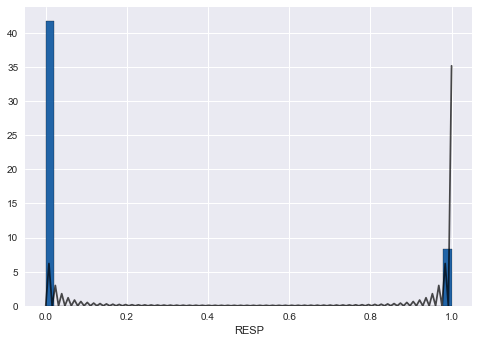

In [222]:
hist(data.RESP)

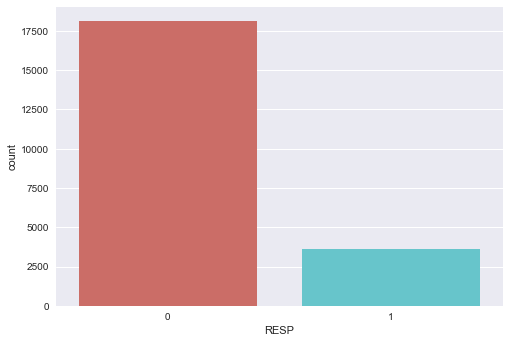

In [223]:
sns.countplot(x='RESP', data=data, palette='hls')
plt.show()

**Looks like we have a negative class imbalance problem in this data set. The '0's are nearly 83% of the data set. **

In [7]:
# for now we are removing varaibles like zip code and response varaible RESP

In [224]:

ZIP_CODE=data["ZIP_CODE"]
RESP=data["RESP"]

In [225]:
data.drop(["ZIP_CODE","RESP"],axis=1,inplace=True)

In [226]:
data.head(1)

,HHKEY,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,...,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,STORELOY,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET
0,9955600066402,208,2,368.46,0,184.23,11,0.18,0.0,0.0,0.3,0.0,0.25,0.0,0.19,...,0.08,9,1,11,1,7,N,0,5,0,0.0,31.81,111.0,10,0.0


In [ ]:
#Converting WEB, CC_CARD in to categorical variables

In [227]:
data["WEB"]=data["WEB"].astype(str)

data["CC_CARD"]=data["CC_CARD"].astype(str)

In [228]:
# divide the data into numerical  ("quan") and categorical ("qual") features
quan = list( data.loc[:,data.dtypes != 'object'].columns.values )
qual = list( data.loc[:,data.dtypes == 'object'].columns.values)

In [229]:
len(qual),len(quan)

(3, 46)

# checking for skewness (>0.75)

In [230]:
from scipy.stats import skew
# Check other numerical feature for whether they have skweness >0.75

skewed_feats = data[quan].apply(lambda x: skew(x.dropna())) # Compute skewness without NaN
                                        # lambda x: 
                                          # Defines a function, by default applying to each column
skewed_feats = skewed_feats[skewed_feats>0.75]

In [ ]:
# List of skewed variables

In [231]:
skewed_feats

HHKEY           13.085128
FRE              4.127656
MON              6.880405
AVRG             3.511469
PC_CALC20        1.031642
PSWEATERS        1.490865
PKNIT_TOPS       6.171141
PKNIT_DRES       4.518426
PBLOUSES         2.677396
PJACKETS         1.571172
PCAR_PNTS        2.440843
PCAS_PNTS        3.059637
PSHIRTS          2.928171
PDRESSES         3.498915
PSUITS           5.014189
POUTERWEAR       7.369048
PJEWELRY        10.173880
PFASHION         5.941349
PLEGWEAR        10.839416
PCOLLSPND        3.068754
AMSPEND         28.615562
PSSPEND          8.529608
CCSPEND         10.016392
AXSPEND         10.512700
TMONSPEND        5.331273
OMONSPEND        5.703227
SMONSPEND        6.327205
PREVPD           4.615461
FREDAYS          1.600199
CLASSES          1.297472
COUPONS          4.349423
STYLES           6.346096
STORES           2.217141
RESPONDED        1.963697
RESPONSERATE     1.530806
HI               1.753373
LTFREDAY         1.675424
CLUSTYPE         1.034544
PERCRET     

In [110]:
len(skewed_feats)

39

In [ ]:
# Tranforming skewed varaibles using log1p transformation

In [232]:
# Log1p transformation for these skewed_features
skewed_feats = list(skewed_feats.index)
data[skewed_feats] = np.log1p(data[skewed_feats])

In [233]:
data.head(2)

,HHKEY,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,...,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,STORELOY,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET
0,29.929156,208,1.098612,5.912042,0,5.221598,2.484907,0.165514,0.00000,0.0,0.262364,0.0,0.223144,0.000000,0.173953,...,0.08,2.302585,0.693147,2.484907,0.693147,7,N,0,5,0.000000,0.000000,3.490733,4.718499,2.397895,0.000000
1,29.929156,6,1.609438,5.556828,1,4.182050,2.484907,0.231112,0.14842,0.0,0.000000,0.0,0.165514,0.131028,0.000000,...,0.33,1.945910,0.000000,2.708050,0.693147,7,Y,0,4,1.098612,3.931826,3.518091,3.795489,2.397895,0.029559


In [ ]:
# Adding response varaible to the dataset

In [234]:
data["RESP"]=RESP
data.head(2)

,HHKEY,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,...,CLASSES,COUPONS,STYLES,STORES,STORELOY,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,29.929156,208,1.098612,5.912042,0,5.221598,2.484907,0.165514,0.00000,0.0,0.262364,0.0,0.223144,0.000000,0.173953,...,2.302585,0.693147,2.484907,0.693147,7,N,0,5,0.000000,0.000000,3.490733,4.718499,2.397895,0.000000,0
1,29.929156,6,1.609438,5.556828,1,4.182050,2.484907,0.231112,0.14842,0.0,0.000000,0.0,0.165514,0.131028,0.000000,...,1.945910,0.000000,2.708050,0.693147,7,Y,0,4,1.098612,3.931826,3.518091,3.795489,2.397895,0.029559,1


In [235]:
# Now we can convert our categorical varaible into numerical varaibles
for item in qual:
    data = pd.concat([data, pd.get_dummies(data[item], prefix=item, prefix_sep='_', sparse=False, drop_first=True)], 
                      axis=1)
    data= data.drop(item, axis=1)

In [236]:
data.head(2)

,HHKEY,REC,FRE,MON,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,...,COUPONS,STYLES,STORES,STORELOY,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP,CC_CARD_1,VALPHON_Y,WEB_1
0,29.929156,208,1.098612,5.912042,5.221598,2.484907,0.165514,0.00000,0.0,0.262364,0.0,0.223144,0.000000,0.173953,0.000000,...,0.693147,2.484907,0.693147,7,5,0.000000,0.000000,3.490733,4.718499,2.397895,0.000000,0,0,0,0
1,29.929156,6,1.609438,5.556828,4.182050,2.484907,0.231112,0.14842,0.0,0.000000,0.0,0.165514,0.131028,0.000000,0.165514,...,0.000000,2.708050,0.693147,7,4,1.098612,3.931826,3.518091,3.795489,2.397895,0.029559,1,1,1,0


In [237]:
data.describe()

,HHKEY,REC,FRE,MON,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,...,COUPONS,STYLES,STORES,STORELOY,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP,CC_CARD_1,VALPHON_Y,WEB_1
count,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,...,21740.000000,21740.000000,21740.000000,21740.00000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000
mean,29.929164,126.966329,1.493320,5.663685,4.529583,2.593093,0.177854,0.024985,0.036097,0.082777,0.115701,0.075420,0.060673,0.059090,0.057810,...,0.343373,2.419765,1.118273,2116.28988,4.672723,0.535385,1.599808,3.429921,3.954694,2.450431,0.091291,0.166099,0.383763,0.859568,0.041536
std,0.000052,104.737712,0.720714,0.964897,0.656681,0.168299,0.172492,0.057471,0.088254,0.110500,0.146873,0.114625,0.107389,0.097082,0.121550,...,0.565430,0.931274,0.398914,1806.10523,3.547191,0.659151,1.777722,0.689634,0.982369,0.878457,0.207622,0.372178,0.486312,0.347443,0.199532
min,29.929156,1.000000,0.693147,0.688135,0.398776,2.484907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.693147,0.693147,3.00000,0.000000,0.000000,0.000000,0.048790,0.086178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.929158,35.000000,0.693147,4.917093,4.126973,2.484907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.791759,0.693147,337.00000,1.000000,0.000000,0.000000,2.965788,3.256461,1.791759,0.000000,0.000000,0.000000,1.000000,0.000000
50%,29.929159,98.000000,1.386294,5.577803,4.533352,2.484907,0.148420,0.000000,0.000000,0.048790,0.039221,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.302585,1.098612,1670.00000,4.000000,0.000000,0.000000,3.418382,3.970292,2.484907,0.000000,0.000000,0.000000,1.000000,0.000000
75%,29.929160,206.000000,1.945910,6.345636,4.945243,2.833213,0.270027,0.029559,0.029559,0.131028,0.207014,0.122218,0.086178,0.095310,0.058269,...,0.693147,3.044522,1.386294,4176.00000,8.000000,1.098612,3.433987,3.931826,4.682131,3.135494,0.086178,0.000000,1.000000,1.000000,0.000000
max,29.930040,365.000000,4.753590,10.021826,7.560539,2.995732,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,...,3.496508,6.612041,2.995732,7504.00000,11.000000,2.484907,4.615121,5.303305,5.899897,3.931826,3.735763,1.000000,1.000000,1.000000,1.000000


In [37]:
list(data)

['HHKEY',
 'REC',
 'FRE',
 'MON',
 'AVRG',
 'PC_CALC20',
 'PSWEATERS',
 'PKNIT_TOPS',
 'PKNIT_DRES',
 'PBLOUSES',
 'PJACKETS',
 'PCAR_PNTS',
 'PCAS_PNTS',
 'PSHIRTS',
 'PDRESSES',
 'PSUITS',
 'POUTERWEAR',
 'PJEWELRY',
 'PFASHION',
 'PLEGWEAR',
 'PCOLLSPND',
 'AMSPEND',
 'PSSPEND',
 'CCSPEND',
 'AXSPEND',
 'TMONSPEND',
 'OMONSPEND',
 'SMONSPEND',
 'PREVPD',
 'GMP',
 'PROMOS',
 'DAYS',
 'FREDAYS',
 'MARKDOWN',
 'CLASSES',
 'COUPONS',
 'STYLES',
 'STORES',
 'STORELOY',
 'MAILED',
 'RESPONDED',
 'RESPONSERATE',
 'HI',
 'LTFREDAY',
 'CLUSTYPE',
 'PERCRET',
 'RESP',
 'CC_CARD_1',
 'VALPHON_Y',
 'WEB_1']

# LOSS MATRIX 

**for this problem our main aim is to improve profitbility of the marketing store and for that purpose our main focus will be
on classifying true positives as accuately as possible.
Based on our business understanding we will be assuming loss value and profit values for True postives, False positives, 
True Negative and False Negative **

In [ ]:
LOSS and profit values as folllows 
True postives :  We assuming store will be able to earn a profit of 20$
False positives: We have assumed a loss of 5$ as there will be cost involved in direct mailing to the customers and 
                 if they dont respond back the store will be lose that money
True Negative: We are assuming the loss to 0$ for this as the company is not wasting its resources on the people who are not interested 
                  in their products. 
False Negative : It is an oppurtunity loss but for this problem it is not a main concern and we are assuming the loss
                 from it as 0 $. 
    

In [ ]:
#  LOSS MATRIX  

In [238]:
loss_tp = 20  # loss (profit) for true postive
loss_fp=-5  #  loss for false positive
loss_fn=0    #  loss for false negative
loss_tn=0    # loss for true negative

# Optimal threshold

In [239]:
threshold=(loss_fp-loss_tn)/(loss_fp+loss_fn-loss_tp-loss_tn)
threshold

0.2

In [240]:
# Splitting the data into test and train
train = data.sample(frac=0.7, random_state=471006100)
test = data[data.index.isin(train.index)==False].copy()

In [ ]:
# Storing customer id and response into separate variables before dropping it

In [242]:
HH_KEY=test["HHKEY"]
RESP=test["RESP"]

In [264]:
HH_KEY

1        29.929156
4        29.929156
7        29.929156
8        29.929156
9        29.929156
11       29.929156
18       29.929156
19       29.929156
24       29.929156
34       29.929156
38       29.929156
42       29.929156
43       29.929156
46       29.929156
50       29.929156
53       29.929156
56       29.929156
59       29.929156
64       29.929156
68       29.929156
69       29.929156
73       29.929156
77       29.929156
78       29.929156
79       29.929156
82       29.929156
84       29.929156
86       29.929156
90       29.929156
91       29.929156
93       29.929156
99       29.929156
105      29.929156
113      29.929156
115      29.929156
125      29.929156
127      29.929156
128      29.929156
131      29.929156
137      29.929156
140      29.929156
141      29.929156
143      29.929156
147      29.929156
148      29.929156
149      29.929156
152      29.929156
155      29.929156
162      29.929156
164      29.929156
165      29.929156
169      29.929156
176      29.

In [ ]:
# separating the predictors and response variables in training data

In [243]:
y_train=train["RESP"]
X_train=train.drop(["RESP","HHKEY"],axis=1)




# SMOTE technique for removing the imbalance

In [244]:
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [ ]:
# Splitting the test data  into predictors and response

In [245]:
  
y_test=test["RESP"]
X_test=test.drop(["RESP","HHKEY"],axis=1)

In [246]:
X_test.shape

(6522, 48)

# standardising of the dataset training and test dataset

In [247]:
mu=X_train_res.mean()
sigma=X_train_res.std()
X_train_res=(X_train_res-mu)/sigma
X_test=(X_test-mu)/sigma




#  Logistic Regression

In [248]:
logit = LogisticRegression()
logit.fit(X_train_res,y_train_res )
train_probs_float_logit=logit.predict_proba(X_train_res)
train_probs_logit=train_probs_float_logit[:,1]  #  probability of getting 1 (getting response)



In [249]:
#  lets see how it works on test data
test_pred_float_logit=logit.predict_proba(X_test)
test_probs_logit=test_pred_float_logit[:,1]  #  probability of getting 1 (getting response)
preds_test_logit=[]
for i in test_probs_logit:
    if i>threshold:
        preds_test_logit.append(1)
    else:
        preds_test_logit.append(0)
#  these are predictions from logistic model
y_test_predictions_logit=preds_test_logit     

In [250]:
y_test_predictions_logit

[1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


# Model performance on test data

In [251]:
from sklearn.metrics import classification_report

print(classification_report(y_test, logit.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      0.65      0.77      5463
          1       0.29      0.75      0.42      1059

avg / total       0.83      0.67      0.71      6522



 # roc_auc and accuracy score

In [252]:
roc_logit=roc_auc_score(y_test,logit.predict(X_test))
roc_accuracy_logit=roc_auc_score(y_test, logit.predict_proba(X_test)[:,1])
roc_logit,roc_accuracy_logit

(0.69908174435385306, 0.76229219591597142)

In [253]:
import itertools

In [37]:
# function for plotting confusion matrix

In [254]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


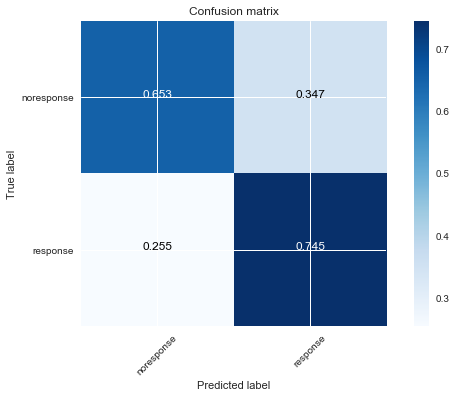

In [255]:

from sklearn.metrics import confusion_matrix
confusion  = confusion_matrix(y_test,logit.predict(X_test) ) 
plot_confusion_matrix(confusion, classes=['noresponse','response'], normalize=True)
plt.show()

In [ ]:
# counts of true negative,false positive, false negative, true positive from Logistic Regression

In [256]:
tn_logit = confusion[0][0]
fp_logit = confusion[0][1]
fn_logit = confusion[1][0]
tp_logit = confusion[1][1]
print (tn_logit,fp_logit,fn_logit,tp_logit)

3568 1895 270 789


# Expected Gross profit from logit model

Using formula: Expected_Grossprofit=(counts of false positive) X (loss from false positive) + (counts of true positive) X (loss from true positive)

In [257]:
Expected_grossprofit_logit=((loss_tp * tp_logit) + (loss_fp * fp_logit))/(fp_logit+tp_logit)
Expected_grossprofit_logit

2.3491058122205661

** Function for calculating grossprofit for each customer**

In [285]:
def calculated_grossprofit_logit(row):
    
    if row.Predictions_logit == 1 and row.RESP==1:
        return 20
    elif row.Predictions_logit == 1 and row.RESP==0:
        return -5
    elif row.Predictions_logit == 0 and row.RESP==1:
        return 0
    else:
        return 0

** Data set for storing predictions from logit model **

In [303]:
table_logit=pd.DataFrame({"Predictions_logit":y_test_predictions_logit,"RESP":RESP})

In [304]:
table_logit.head(2)

,Predictions_logit,RESP
1,1,1
4,1,0


** Adding Gross Profit for each customer into our dataframe depending upon Loss matrix defined above in the notebook **

In [305]:
table_logit["GrossProfit_logit"]=table_logit.apply(calculated_grossprofit_logit,axis=1)

In [306]:
table_logit.head(6)

,Predictions_logit,RESP,GrossProfit_logit
1,1,1,20
4,1,0,-5
7,0,0,0
8,0,0,0
9,1,1,20
11,1,0,-5


** Function for calculating bootstrap confidence interval for Grossprofit from each model(99% Confidence Interval) **

In [267]:
# Pass the argument that is 1. the grossProfit for the classifier, 2. classifier_name
def calculate_CI_grossprofit(grossProfit_model, classifier_name):
    S = 10000 # Number of bootstrap replications (start small!)
    n = len(grossProfit_model) # It is useful to store the size of the data
    
    mean_boot=[]
    
    for i in range(S):
        x_boot = grossProfit_model.iloc[np.random.randint(n, size=n)] # draws a sample of size n from x with replacement
        mean_boot.append(x_boot.mean()) # adds the mean of the bootstrap sample

    ci_low = np.percentile(mean_boot, 0.5)
    ci_high = np.percentile(mean_boot, 99.5)
   
    print('For ' + classifier_name +  ' classifier low confidence interval is ' + str(round(ci_low, 3)))
    print('For ' + classifier_name +  ' classifier high confidence interval is ' + str(round(ci_high, 3)))



** Confidence interval for Expected Gross Profit from Logistic regression **

In [268]:
calculate_CI_grossprofit(table_logit["GrossProfit_logit"], 'logit')

For logit classifier low confidence interval is -0.314
For logit classifier high confidence interval is 0.249


** ROC_AUC Curve **

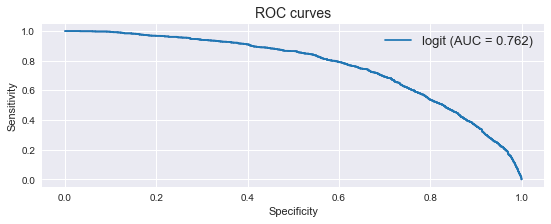

In [269]:
palette = '#1F77B4'
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fig, ax= plt.subplots(figsize=(9,3))
y_prob = logit.predict_proba(X_test)  #getting the  predictions in  probability form      
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
auc = roc_auc_score(y_test, y_prob[:,1])
ax.plot(1-fpr, tpr )
ax.plot(1-fpr, tpr, label="logit" + ' (AUC = {:.3f})'.format(auc), color=palette)
ax.set_xlabel('Specificity')
ax.set_ylabel('Sensitivity')
ax.set_title('ROC curves', fontsize=14)
plt.legend(fontsize=13)
plt.show()

#  Naive Bayes

In [270]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)
train_probs_float_naive=gnb.predict_proba(X_train_res)
train_probs_naive=train_probs_float_naive[:,1]  #  probability of getting 1 (getting response)



In [271]:
#  lets see how it works on test data
test_pred_float_naive=gnb.predict_proba(X_test)
test_probs_naive=test_pred_float_logit[:,1]  #  probability of getting 1 (getting response)
preds_test_naive=[]
for i in test_probs_naive:
    if i>threshold:
        preds_test_naive.append(1)
    else:
        preds_test_naive.append(0)
#  these are predictions from Naive Bayes
y_test_predictions_naive=preds_test_naive 

In [272]:
y_test_predictions_naive

[1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


# Model performance on test data

In [273]:
print(classification_report(y_test, gnb.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      0.71      0.81      5463
          1       0.33      0.73      0.45      1059

avg / total       0.83      0.72      0.75      6522



# roc_auc and accuracy score

In [274]:
roc_naive=roc_auc_score(y_test,gnb.predict(X_test))
roc_accuracy_naive=roc_auc_score(y_test, gnb.predict_proba(X_test)[:,1])
roc_naive,roc_accuracy_naive

(0.72058877672563137, 0.79536047895041884)

In [ ]:
# PLot of confusion matrix

Normalized confusion matrix


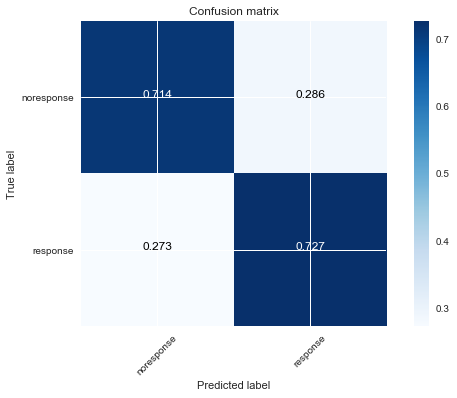

In [275]:
confusion  = confusion_matrix(y_test,gnb.predict(X_test) ) 
plot_confusion_matrix(confusion, classes=['noresponse','response'], normalize=True)
plt.show()

In [276]:
confusion

array([[3901, 1562],
       [ 289,  770]], dtype=int64)

In [ ]:
# counts of true negative,false positive, false negative, true positive from Naive Bayes model

In [277]:
tn_naive = confusion[0][0]
fp_naive = confusion[0][1]
fn_naive = confusion[1][0]
tp_naive = confusion[1][1]
print (tn_naive,fp_naive,fn_naive,tp_naive)

3901 1562 289 770


# Expected Gross profit from Naive Bayes model

In [278]:
Expected_grossprofit_naive=((loss_tp * tp_naive) + (loss_fp * fp_naive))/(fp_naive+tp_naive)
Expected_grossprofit_naive

3.2547169811320753

In [295]:
def calculated_grossprofit_naive(row):
    
    if row.Predictions_naive == 1 and row.RESP==1:
        return 20
    elif row.Predictions_naive == 1 and row.RESP==0:
        return -5
    elif row.Predictions_naive == 0 and row.RESP==1:
        return 0
    else:
        return 0

**New data set  for storing predictions and comparing them with actual response variable **

In [307]:
table_naive=pd.DataFrame({"Predictions_naive":y_test_predictions_naive,"RESP":RESP})

In [308]:
table_naive.head(2)

,Predictions_naive,RESP
1,1,1
4,1,0


**Adding Gross Profit for each customer into our dataframe depending upon the Loss matrix defined above in the notebook **

In [309]:
table_naive["GrossProfit_naive"]=table_naive.apply(calculated_grossprofit_naive,axis=1)

In [310]:
table_naive.head(2)

,Predictions_naive,RESP,GrossProfit_naive
1,1,1,20
4,1,0,-5


**Confidence interval for Expected Gross Profit from Naive Bayes model**

In [348]:
calculate_CI_grossprofit(table_naive["GrossProfit_naive"], 'Naive Bayes')

For Naive Bayes classifier low confidence interval is -0.308
For Naive Bayes classifier high confidence interval is 0.251


# ROC_AUC Curve

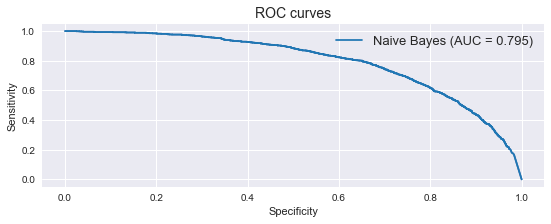

In [312]:
palette = '#1F77B4'
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fig, ax= plt.subplots(figsize=(9,3))
y_prob = gnb.predict_proba(X_test)  #getting the  predictions in  probability form      
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
auc = roc_auc_score(y_test, y_prob[:,1])
ax.plot(1-fpr, tpr )
ax.plot(1-fpr, tpr, label="Naive Bayes" + ' (AUC = {:.3f})'.format(auc), color=palette)
ax.set_xlabel('Specificity')
ax.set_ylabel('Sensitivity')
ax.set_title('ROC curves', fontsize=14)
plt.legend(fontsize=13)
plt.show()

# Random Forest

In [313]:
rdf= RandomForestClassifier(n_estimators=25, random_state=12)
rdf.fit(X_train_res, y_train_res)
train_probs_float_rdf=rdf.predict_proba(X_train_res)
train_probs_rdf=train_probs_float_rdf[:,1]  #  probability of getting 1 (getting response)


In [314]:
#  lets see how it works on test data
test_pred_float_rdf=rdf.predict_proba(X_test)
test_probs_rdf=test_pred_float_rdf[:,1]  #  probability of getting 1 (getting response)
preds_test_rdf=[]
for i in test_probs_rdf:
    if i>threshold:
        preds_test_rdf.append(1)
    else:
        preds_test_rdf.append(0)
#  these are predictions from Random Forest
y_test_predictions_rdf=preds_test_rdf

# Model performance on test data

In [315]:
print(classification_report(y_test,rdf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.89      0.90      0.89      5463
          1       0.45      0.42      0.43      1059

avg / total       0.82      0.82      0.82      6522



# roc_auc and accuracy score

In [316]:
roc_rdf=roc_auc_score(y_test,rdf.predict(X_test))
roc_accuracy_rdf=roc_auc_score(y_test, rdf.predict_proba(X_test)[:,1])
roc_rdf,roc_accuracy_rdf

(0.65822823537586617, 0.81005492006747426)

# Plot of confusion matrix

Normalized confusion matrix


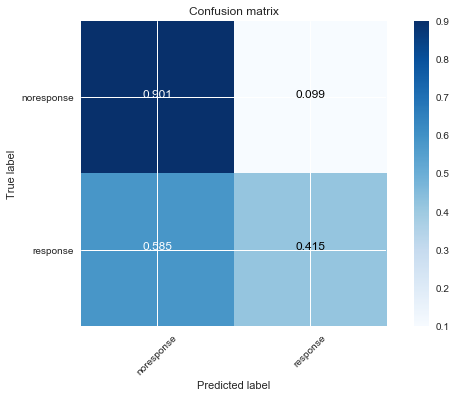

In [317]:
confusion  = confusion_matrix(y_test,rdf.predict(X_test) ) 
plot_confusion_matrix(confusion, classes=['noresponse','response'], normalize=True)
plt.show()

In [318]:
confusion

array([[4922,  541],
       [ 619,  440]], dtype=int64)

** counts of true negative,false positive, false negative, true positive from random forest **

In [319]:
tn_rdf = confusion[0][0]
fp_rdf = confusion[0][1]
fn_rdf = confusion[1][0]
tp_rdf = confusion[1][1]
print (tn_rdf,fp_rdf,fn_rdf,tp_rdf)

4922 541 619 440


# Expected Gross profit from Random Forest

In [320]:
Expected_grossprofit_rdf=((loss_tp * tp_rdf) + (loss_fp * fp_rdf))/(fp_rdf+tp_rdf)
Expected_grossprofit_rdf

6.2130479102956171

** New data set for storing predictions and comparing them with actual response variable  **

In [321]:
table_rdf=pd.DataFrame({"Predictions_rdf":y_test_predictions_rdf,"RESP":RESP})

In [322]:
table_rdf.head(2)

,Predictions_rdf,RESP
1,1,1
4,1,0


**Function for calculating grossprofit for each customer**

In [323]:
def calculated_grossprofit_rdf(row):
    
    if row.Predictions_rdf == 1 and row.RESP==1:
        return 20
    elif row.Predictions_rdf == 1 and row.RESP==0:
        return -5
    elif row.Predictions_rdf == 0 and row.RESP==1:
        return 0
    else:
        return 0

** Adding Gross Profit for each customer into our dataframe depending upon the Loss matrix defined above in the notebook  **

In [324]:
table_rdf["GrossProfit_rdf"]=table_rdf.apply(calculated_grossprofit_rdf,axis=1)

In [325]:
table_rdf.head(2)

,Predictions_rdf,RESP,GrossProfit_rdf
1,1,1,20
4,1,0,-5


** Confidence interval for Expected Gross Profit from Random Forest **

In [326]:
calculate_CI_grossprofit(table_rdf["GrossProfit_rdf"], 'Random Forest')

For Random Forest classifier low confidence interval is 0.977
For Random Forest classifier high confidence interval is 1.49


** ROC_AUC Curve **

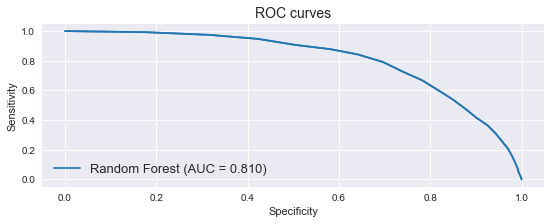

In [327]:
palette = '#1F77B4'
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fig, ax= plt.subplots(figsize=(9,3))
y_prob = rdf.predict_proba(X_test)    
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
auc = roc_auc_score(y_test, y_prob[:,1])
ax.plot(1-fpr, tpr )
ax.plot(1-fpr, tpr, label="Random Forest" + ' (AUC = {:.3f})'.format(auc), color=palette)
ax.set_xlabel('Specificity')
ax.set_ylabel('Sensitivity')
ax.set_title('ROC curves', fontsize=14)
plt.legend(fontsize=13)
plt.show()

 # L-2 Regularised logistic regression

In [328]:
from sklearn.linear_model import LogisticRegressionCV
logit_l2 = LogisticRegressionCV(penalty='l2')
logit_l2.fit(X_train_res, y_train_res)
train_probs_float_logit_l2=logit_l2.predict_proba(X_train_res)
train_probs_logit_l2=train_probs_float_logit_l2[:,1]  #  probability of getting 1 (getting response)

In [329]:
#  lets see how it works on test data
test_pred_float_logit_l2=logit_l2.predict_proba(X_test)
test_probs_logit_l2=test_pred_float_logit_l2[:,1]  #  probability of getting 1 (getting response)
preds_test_logit_l2=[]
for i in test_probs_logit_l2:
    if i>threshold:
        preds_test_logit_l2.append(1)
    else:
        preds_test_logit_l2.append(0)
#  predictions from L-2 Regularised logistic regression
y_test_predictions_logit_l2=preds_test_logit_l2 

# Model performance on test data

In [330]:
print(classification_report(y_test, logit_l2.predict(X_test)))

             precision    recall  f1-score   support

          0       0.94      0.75      0.84      5463
          1       0.37      0.77      0.50      1059

avg / total       0.85      0.75      0.78      6522



# roc_auc and accuracy score

In [331]:
roc_logit_l2=roc_auc_score(y_test,logit_l2.predict(X_test))
roc_accuracy_logit_l2=roc_auc_score(y_test, logit_l2.predict_proba(X_test)[:,1])
roc_logit_l2,roc_accuracy_logit_l2

(0.75949952267092713, 0.84642017023440552)

# Plot of confusion matrix

Normalized confusion matrix


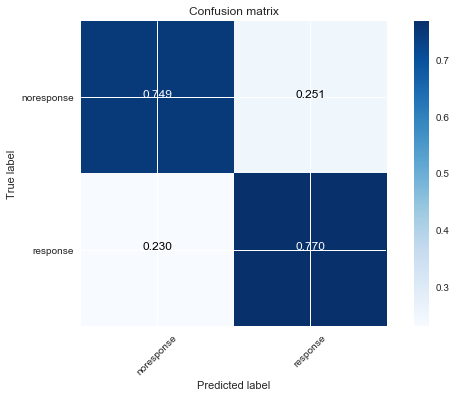

In [332]:
confusion  = confusion_matrix(y_test,logit_l2.predict(X_test) ) 
plot_confusion_matrix(confusion, classes=['noresponse','response'], normalize=True)
plt.show()

In [333]:
confusion

array([[4094, 1369],
       [ 244,  815]], dtype=int64)

** counts of true negative,false positive, false negative, true positive from L-2 Regularised logistic regression  **

In [334]:
tn_logit_l2 = confusion[0][0]
fp_logit_l2 = confusion[0][1]
fn_logit_l2 = confusion[1][0]
tp_logit_l2 = confusion[1][1]
print (tn_logit_l2,fp_logit_l2,fn_logit_l2,tp_logit_l2)

4094 1369 244 815


# Expected Gross profit from L-2 Regularised logistic regression

In [335]:
Expected_grossprofit_logit_l2=((loss_tp * tp_logit_l2) + (loss_fp * fp_logit_l2))/(fp_logit_l2+tp_logit_l2)
Expected_grossprofit_logit_l2

4.3292124542124544

** New data set for storing predictions and comparing them with actual response variable **

In [336]:
table_logit_l2=pd.DataFrame({"Predictions_logit_l2":y_test_predictions_logit_l2,"RESP":RESP})

In [337]:
table_logit_l2.head(2)

,Predictions_logit_l2,RESP
1,1,1
4,1,0


** Function for calculating grossprofit for each customer  **

In [342]:
def calculated_grossprofit_logit_l2(row):
    
    if row.Predictions_logit_l2 == 1 and row.RESP==1:
        return 20
    elif row.Predictions_logit_l2 == 1 and row.RESP==0:
        return -5
    elif row.Predictions_logit_l2 == 0 and row.RESP==1:
        return 0
    else:
        return 0

**Adding Gross Profit for each customer into our dataframe depending upon the Loss matrix defined above in the notebook **

In [343]:
table_logit_l2["GrossProfit_logit_l2"]=table_logit_l2.apply(calculated_grossprofit_logit_l2,axis=1)

In [344]:
table_logit_l2.head(2)

,Predictions_logit_l2,RESP,GrossProfit_logit_l2
1,1,1,20
4,1,0,-5


** Confidence interval for Expected GrossProfit from L-2 Regularised logistic regression **

In [346]:
calculate_CI_grossprofit(table_logit_l2["GrossProfit_logit_l2"], ' L-2 Regularised logistic regression')

For  L-2 Regularised logistic regression classifier low confidence interval is 0.627
For  L-2 Regularised logistic regression classifier high confidence interval is 1.165


** ROC_AUC Curve **

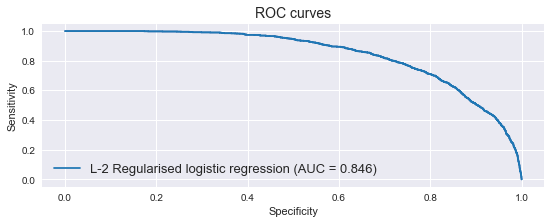

In [347]:
palette = '#1F77B4'
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fig, ax= plt.subplots(figsize=(9,3))
y_prob = logit_l2.predict_proba(X_test)  #getting the  predictions in  probability form      
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
auc = roc_auc_score(y_test, y_prob[:,1])
ax.plot(1-fpr, tpr )
ax.plot(1-fpr, tpr, label="L-2 Regularised logistic regression" + ' (AUC = {:.3f})'.format(auc), color=palette)
ax.set_xlabel('Specificity')
ax.set_ylabel('Sensitivity')
ax.set_title('ROC curves', fontsize=14)
plt.legend(fontsize=13)
plt.show()

# Gaussian discriminant analysis

# Linear Discriminant Analysis

In [350]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_res, y_train_res)
train_probs_float_lda=lda.predict_proba(X_train_res)
train_probs_lda=train_probs_float_lda[:,1]  #  probability of getting 1 (getting response)


In [351]:
#  lets see how it works on test data
test_pred_float_lda=lda.predict_proba(X_test)
test_probs_lda=test_pred_float_lda[:,1]  #  probability of getting 1 (getting response)
preds_test_lda=[]
for i in test_probs_lda:
    if i>threshold:
        preds_test_lda.append(1)
    else:
        preds_test_lda.append(0)
#  these are predictions from LDA
y_test_predictions_lda=preds_test_lda

In [352]:
y_test_predictions_lda

[1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,


# Model performance on test data

In [353]:
print(classification_report(y_test, lda.predict(X_test)))

             precision    recall  f1-score   support

          0       0.95      0.74      0.83      5463
          1       0.37      0.79      0.51      1059

avg / total       0.85      0.75      0.78      6522



# roc_auc and accuracy score

In [354]:
roc_lda=roc_auc_score(y_test,lda.predict(X_test))
roc_accuracy_lda=roc_auc_score(y_test, lda.predict_proba(X_test)[:,1])
roc_lda,roc_accuracy_lda

(0.76651478216319002, 0.85420902605682636)

#  Plot of confusion matrix

Normalized confusion matrix


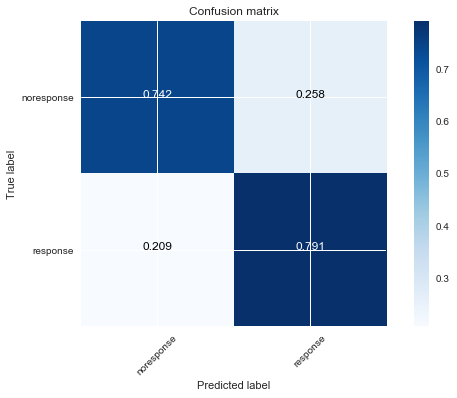

In [355]:
confusion  = confusion_matrix(y_test,lda.predict(X_test) ) 
plot_confusion_matrix(confusion, classes=['noresponse','response'], normalize=True)
plt.show()

In [356]:
confusion

array([[4052, 1411],
       [ 221,  838]], dtype=int64)

In [ ]:
# counts of true negative,false positive, false negative, true positive from Linear Discriminant Analysis

In [357]:
tn_lda = confusion[0][0]
fp_lda = confusion[0][1]
fn_lda = confusion[1][0]
tp_lda = confusion[1][1]
print (tn_lda,fp_lda,fn_lda,tp_lda)

4052 1411 221 838


# Expected Gross profit from  Linear Discriminant Analysis

In [358]:
Expected_grossprofit_lda=((loss_tp * tp_lda) + (loss_fp * fp_lda))/(fp_lda+tp_lda)
Expected_grossprofit_lda

4.3152512227656734

** New data set for storing predictions and comparing them with actual response variable **

In [359]:
table_lda=pd.DataFrame({"Predictions_lda":y_test_predictions_lda,"RESP":RESP})

In [361]:
table_lda.head(5)

,Predictions_lda,RESP
1,1,1
4,0,0
7,1,0
8,0,0
9,1,1


** Function for calculating Expected Gross Profit for each customer  **

In [362]:
def calculated_grossprofit_lda(row):
    
    if row.Predictions_lda == 1 and row.RESP==1:
        return 20
    elif row.Predictions_lda == 1 and row.RESP==0:
        return -5
    elif row.Predictions_lda == 0 and row.RESP==1:
        return 0
    else:
        return 0

**Adding Gross Profit for each customer into our dataframe depending upon the Loss matrix defined above in the notebook **

In [363]:
table_lda["GrossProfit_lda"]=table_lda.apply(calculated_grossprofit_lda,axis=1)

In [364]:
table_lda.head(3)

,Predictions_lda,RESP,GrossProfit_lda
1,1,1,20
4,0,0,0
7,1,0,-5


**Confidence interval for Expected Gross Profit from Linear Discriminant Analysis **

In [365]:
calculate_CI_grossprofit(table_lda["GrossProfit_lda"], 'Linear Discriminant Analysis')

For Linear Discriminant Analysis classifier low confidence interval is 0.701
For Linear Discriminant Analysis classifier high confidence interval is 1.251


** ROC_AUC Curve **

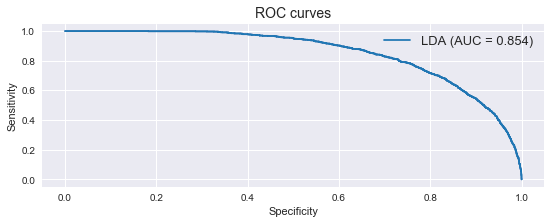

In [366]:
palette = '#1F77B4'
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fig, ax= plt.subplots(figsize=(9,3))
y_prob = lda.predict_proba(X_test)  #getting the  predictions in  probability form      
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
auc = roc_auc_score(y_test, y_prob[:,1])
ax.plot(1-fpr, tpr )
ax.plot(1-fpr, tpr, label="LDA" + ' (AUC = {:.3f})'.format(auc), color=palette)
ax.set_xlabel('Specificity')
ax.set_ylabel('Sensitivity')
ax.set_title('ROC curves', fontsize=14)
plt.legend(fontsize=13)
plt.show()

#  Quadratic Discriminant Analysis

In [367]:

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_res, y_train_res)
train_probs_float_qda=qda.predict_proba(X_train_res)
train_probs_qda=train_probs_float_qda[:,1]  #  probability of getting 1 (getting response)



In [368]:
#  lets see how it works on test data
test_pred_float_qda=qda.predict_proba(X_test)
test_probs_qda=test_pred_float_qda[:,1]  #  probability of getting 1 (getting response)
preds_test_qda=[]
for i in test_probs_qda:
    if i>threshold:
        preds_test_qda.append(1)
    else:
        preds_test_qda.append(0)
#  these are predictions from Quadratic Discriminant Analysis
y_test_predictions_qda=preds_test_qda

# Model performance on test data

In [371]:
print(classification_report(y_test, qda.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      0.73      0.81      5463
          1       0.33      0.70      0.45      1059

avg / total       0.83      0.72      0.76      6522



# roc_auc and accuracy score

In [373]:
roc_qda=roc_auc_score(y_test,qda.predict(X_test))
roc_accuracy_qda=roc_auc_score(y_test, qda.predict_proba(X_test)[:,1])
roc_qda,roc_accuracy_qda

(0.71350091965574214, 0.79053360429514929)

# Plot of confusion matrix

Normalized confusion matrix


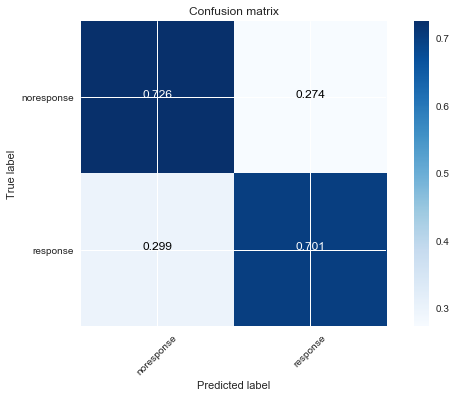

In [374]:
confusion  = confusion_matrix(y_test,qda.predict(X_test) ) 
plot_confusion_matrix(confusion, classes=['noresponse','response'], normalize=True)
plt.show()

In [375]:
confusion

array([[3968, 1495],
       [ 317,  742]], dtype=int64)

In [ ]:
# counts of true negative,false positive, false negative, true positive from Quadratic Discriminant Analysis

In [376]:
tn_qda = confusion[0][0]
fp_qda = confusion[0][1]
fn_qda = confusion[1][0]
tp_qda = confusion[1][1]
print (tn_qda,fp_qda,fn_qda,tp_qda)

3968 1495 317 742


** Expected Gross profit from Quadratic Discriminant Analysis **

Expected_grossprofit_qda=((loss_tp * tp_qda) + (loss_fp * fp_qda))/(fp_qda+tp_qda)
Expected_grossprofit_qda

** New data set for storing predictions and comparing them with actual response variable **

In [379]:
table_qda=pd.DataFrame({"Predictions_qda":y_test_predictions_lda,"RESP":RESP})

In [381]:
table_qda.head(3)

,Predictions_qda,RESP
1,1,1
4,0,0
7,1,0


** Function for calculating Gross Profit for each customer  **

In [382]:
def calculated_grossprofit_qda(row):
    
    if row.Predictions_qda == 1 and row.RESP==1:
        return 20
    elif row.Predictions_qda == 1 and row.RESP==0:
        return -5
    elif row.Predictions_qda == 0 and row.RESP==1:
        return 0
    else:
        return 0

**Adding Gross Profit for each customer into our dataframe depending upon the Loss matrix defined above in the notebook **

In [384]:
table_qda["GrossProfit_qda"]=table_qda.apply(calculated_grossprofit_qda,axis=1)

In [385]:
table_qda.head(2)

,Predictions_qda,RESP,GrossProfit_qda
1,1,1,20
4,0,0,0



** Confidence interval for Expected Gross Profit from Quadratic Discriminant Analysis **

In [386]:
calculate_CI_grossprofit(table_qda["GrossProfit_qda"], ' Quadratic Discriminant Analysis')

For  Quadratic Discriminant Analysis classifier low confidence interval is 0.699
For  Quadratic Discriminant Analysis classifier high confidence interval is 1.238


** ROC_AUC Curve **

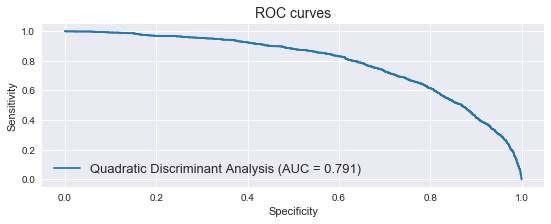

In [387]:
palette = '#1F77B4'
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fig, ax= plt.subplots(figsize=(9,3))
y_prob = qda.predict_proba(X_test)  #getting the  predictions in  probability form      
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
auc = roc_auc_score(y_test, y_prob[:,1])
ax.plot(1-fpr, tpr )
ax.plot(1-fpr, tpr, label="Quadratic Discriminant Analysis" + ' (AUC = {:.3f})'.format(auc), color=palette)
ax.set_xlabel('Specificity')
ax.set_ylabel('Sensitivity')
ax.set_title('ROC curves', fontsize=14)
plt.legend(fontsize=13)
plt.show()

# Model Evaluation

** Comparison of each model on the basis of Expected Gross Profit **

In [388]:
columns=['Expected Gross Profit']
rows=["Logistic Regression","Naive Bayes","Random Forest","L2 regularised","LDA","QDA"]
gross_profits = [Expected_grossprofit_logit,Expected_grossprofit_naive
                                ,Expected_grossprofit_rdf,Expected_grossprofit_logit_l2,Expected_grossprofit_lda,
                                                                    Expected_grossprofit_qda]
results=pd.DataFrame(0.0, columns=columns, index=rows)

i=0
for row in rows:
    results.iloc[i,0] = gross_profits[i]
    i = i + 1
    
results.round(3)

,Expected Gross Profit
Logistic Regression,2.349
Naive Bayes,3.255
Random Forest,6.213
L2 regularised,4.329
LDA,4.315
QDA,3.292


**We can see from the above table that expected gross profit is maximum for random forest and its expected gross profit is 6.213 **

In [389]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score

columns=['Error rate', 'SE', 'Sensitivity', 'Specificity', 'AUC', 'Precision']
rows=['Logistic Regression', 'Naive Bayes', 'Random Forest', 'L2 regularised', 'LDA', 'QDA']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[logit,gnb,rdf,logit_l2, lda, qda]

for i, method in enumerate(methods):
    
    if i < 4:
        y_pred = method.predict(X_test)
        y_prob = method.predict_proba(X_test)
    else:
        y_pred = method.predict(X_test)
        y_prob = method.predict_proba(X_test)
    
    confusion  = confusion_matrix(y_test, y_pred) 
    error_rate =  1 - accuracy_score(y_test, y_pred)

    results.iloc[i,0]=  error_rate
    results.iloc[i,1]=  np.sqrt(error_rate*(1- error_rate)/len(y_test))
    results.iloc[i,2]=  confusion[1,1]/np.sum(confusion[1,:])
    results.iloc[i,3]=  confusion[0,0]/np.sum(confusion[0,:])
    results.iloc[i,4]=  roc_auc_score(y_test, y_prob[:,1])
    results.iloc[i,5]=  precision_score(y_test, y_pred)

results.round(3)

,Error rate,SE,Sensitivity,Specificity,AUC,Precision
Logistic Regression,0.332,0.006,0.745,0.653,0.762,0.294
Naive Bayes,0.284,0.006,0.727,0.714,0.795,0.330
Random Forest,0.178,0.005,0.415,0.901,0.810,0.449
L2 regularised,0.247,0.005,0.770,0.749,0.846,0.373
LDA,0.250,0.005,0.791,0.742,0.854,0.373
QDA,0.278,0.006,0.701,0.726,0.791,0.332


** We can see from the above table that Precision score (.449)  for Random Forest is highest among all the model used.
For this problem we have  mentioned model will be selected on the basis of expected gross profit and precision score.
For both these parameters of profibility and precision score Random Forest ig giving us  the best results.
We will recommend to use Random Forest model .**

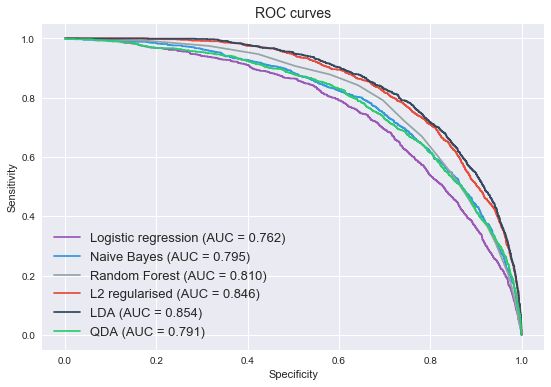

In [391]:
palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

from sklearn.metrics import roc_curve

labels=[ 'Logistic regression',"Naive Bayes","Random Forest", 'L2 regularised', 'LDA', 'QDA']
methods=[logit,gnb,rdf,logit_l2, lda, qda]

fig, ax= plt.subplots(figsize=(9,6))

for i, method in enumerate(methods):
    if i < 3:
        y_prob = method.predict_proba(X_test)
    else:
        y_prob = method.predict_proba(X_test)
        
    fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
    auc = roc_auc_score(y_test, y_prob[:,1])
    ax.plot(1-fpr, tpr, label=labels[i] + ' (AUC = {:.3f})'.format(auc), color = palette[i])
    
ax.set_xlabel('Specificity')
ax.set_ylabel('Sensitivity')
ax.set_title('ROC curves', fontsize=14)
plt.legend(fontsize=13)
plt.show()